#### 1. Import Necessary Packages and Data

In [1]:
# GENERAL IMPORTS
import pandas as pd                                    #Used to read data
import csv                                             #Used for read data
import numpy as np                                     #Used to compute Root Mean Square Error
import matplotlib.pyplot as plt                        #Used to visualize data
import seaborn as sns                                  #Used to visualize data
from sklearn.model_selection import train_test_split   #Used to split the data into test and train sets 
from sklearn import metrics                            #Used to compute R^2, Mean Abs Error and Mean Square Error  
from sklearn.feature_selection import SelectKBest      #Used to compute the k scores and select features accordingly
from sklearn.feature_selection import f_regression     #Used to test the efficacy of each feature
from scipy.stats import gaussian_kde                   #Used to compute point density

# MODEL SPECIFIC IMPORTS
from sklearn.svm import SVR                            #Used to fit and predict a Support Vector Regression Model 

# DATA IMPORT
inputData = pd.read_excel(r'/Users/emilyknight/Documents/BMEN415 Final Project/Volumetric_features.xlsx', engine='openpyxl').sample(frac = 1) #Import data

inputData.head() #Print complete dataset to console

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
1525,1526,8026.7,766.5,10420.2,49913.4,7174.7,3191.1,3941.3,1802.8,935.2,...,2.509,2.459,3.346,2.454,2.935,2.42813,999264,1411115.900,47,2
3727,3728,24975.8,476.9,20816.1,55139.3,8598.8,3684.0,5212.4,2699.6,1139.8,...,2.608,2.658,3.596,2.714,2.957,2.49620,1272073,1804291.504,37,9
1544,1545,8768.8,247.9,16546.0,62027.5,7826.7,3098.1,5251.7,2300.9,1355.4,...,2.602,2.643,4.068,2.651,2.827,2.49787,1255632,1684917.050,60,2
3222,3223,15751.2,373.3,16034.0,51003.7,7972.8,3672.0,4732.2,1965.1,724.1,...,2.419,3.103,3.675,2.335,2.902,2.34734,1001728,1395912.755,50,8
2731,2732,5037.5,438.3,14856.3,51933.5,7453.9,2623.2,5076.2,1925.7,1004.9,...,2.336,2.811,3.337,2.145,2.639,2.31177,1111506,1273500.730,54,7


#### 2. Determine Data Correlation with the Output Variable

In [2]:
cor = inputData.corr() #Define correlation 

cor_target = abs(cor["Age"]) #Find correlation with age

relevant_features = cor_target[cor_target>0.6] #Determine relevant features (features with >60% correlation) 

relevant_features.to_frame #Turn the series of relevant features into a dataframe
relevant_features #Print relevant features to console

Left-Thalamus                        0.696598
3rd-Ventricle                        0.616427
Left-Hippocampus                     0.601390
Left-Amygdala                        0.612836
Left-choroid-plexus                  0.630961
Right-Thalamus                       0.677696
Right-Putamen                        0.620966
Right-Accumbens-area                 0.658007
lhCortexVol                          0.657288
rhCortexVol                          0.656251
CortexVol                            0.658139
SubCortGrayVol                       0.676319
TotalGrayVol                         0.668308
lh_inferiorparietal_thickness        0.629624
lh_parsopercularis_thickness         0.640510
lh_parstriangularis_thickness        0.635172
lh_postcentral_thickness             0.606031
lh_precentral_thickness              0.638825
lh_precuneus_thickness               0.634651
lh_rostralmiddlefrontal_thickness    0.648759
lh_superiorfrontal_thickness         0.695692
lh_superiortemporal_thickness     

#### 3. Create New Dataframe with Relevant Features

In [3]:
relevant_feature_names = relevant_features.index.values #Create tuple of relevant feature names
relevantData = inputData.filter(relevant_feature_names, axis=1) #Copy relevant features to a new dataframe
relevantData.head() #Print relevant dataset to console

,Left-Thalamus,3rd-Ventricle,Left-Hippocampus,Left-Amygdala,Left-choroid-plexus,Right-Thalamus,Right-Putamen,Right-Accumbens-area,lhCortexVol,rhCortexVol,...,rh_parstriangularis_thickness,rh_postcentral_thickness,rh_precentral_thickness,rh_precuneus_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_MeanThickness_thickness,Age
1525,7174.7,935.2,4571.0,1600.3,475.7,6116.0,4174.1,426.6,219413.8993,217512.5065,...,2.383,2.108,2.437,2.396,2.382,2.701,2.582,2.509,2.42813,47
3727,8598.8,1139.8,4520.9,2038.4,884.9,9052.4,5460.6,592.8,268729.8831,275692.5491,...,2.498,2.143,2.696,2.363,2.329,2.683,2.725,2.608,2.49620,37
1544,7826.7,1355.4,4326.0,1585.5,533.5,8086.9,5126.0,474.3,268896.3364,269163.3537,...,2.462,2.261,2.460,2.482,2.384,2.711,2.813,2.602,2.49787,60
3222,7972.8,724.1,3677.2,1442.5,805.3,7525.8,4716.5,384.4,197939.6857,194179.0352,...,2.377,1.974,2.448,2.227,2.310,2.723,2.567,2.419,2.34734,50
2731,7453.9,1004.9,3348.2,1912.8,451.6,7403.8,5030.8,484.7,228998.3203,230880.4343,...,2.471,1.895,2.228,2.327,2.295,2.643,2.381,2.336,2.31177,54


#### 4. Select and Split Input and Output Vectors

In [4]:
# Select Input Vector, X, and Output Vector, y
X = relevantData.drop(columns= ['Age']) #Input vector is the brain volume
y = relevantData['Age'] #Output data is the age

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #Split vectors, 20% will be used for testing 

#### 5. Graph Feature Scores for the Input and Output Vectors

Feature 0: 3139.358641
Feature 1: 2074.360857
Feature 2: 1877.129945
Feature 3: 2003.836476
Feature 4: 2208.233729
Feature 5: 2819.229748
Feature 6: 2119.719709
Feature 7: 2695.161116
Feature 8: 2585.758674
Feature 9: 2548.174092
Feature 10: 2583.346229
Feature 11: 2812.465459
Feature 12: 2740.655658
Feature 13: 2262.566723
Feature 14: 2395.668632
Feature 15: 2363.380747
Feature 16: 1994.415238
Feature 17: 2414.443789
Feature 18: 2344.019436
Feature 19: 2477.187153
Feature 20: 3259.230875
Feature 21: 2830.824441
Feature 22: 2621.847909
Feature 23: 3417.015233
Feature 24: 2452.413125
Feature 25: 2597.090681
Feature 26: 3121.536995
Feature 27: 1887.592365
Feature 28: 2235.151944
Feature 29: 2286.965640
Feature 30: 2351.029327
Feature 31: 2870.873128
Feature 32: 3005.547207
Feature 33: 2730.134089
Feature 34: 3448.374504


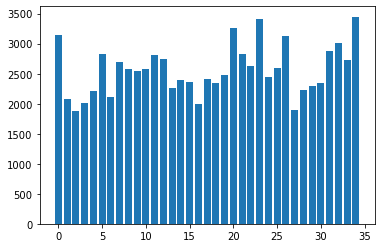

In [5]:
def select_features(X_train, y_train, X_test): #Function used to select applicable features
    fs = SelectKBest(score_func=f_regression, k='all') #Configure to Select All Features
    fs.fit(X_train, y_train)  #Learn the relationship from training data
    X_train_fs = fs.transform(X_train) #Transform the input training data
    X_test_fs = fs.transform(X_test) #Transform the input test data
    return X_train_fs, X_test_fs, fs
 
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test) #Select applicable features

for i in range(len(fs.scores_)): #For each of the feature scores
    print('Feature %d: %f' % (i, fs.scores_[i])) #Print the score to the console

    
plt.bar([i for i in range(len(fs.scores_))], fs.scores_) #Plot the scores where a longer bar represents a more applicable feature
plt.show()

#### 6. Determine the Best Features

In [6]:
k = 10    #Obtaining the k(10) best features

indices = np.argsort(fs.scores_)[::-1] #Sort the features
print(indices) #Print the features from best to worst

relevantData.corr()#Print the feature correlation

[34 23 20  0 26 32 31 21  5 11 12 33  7 22 25  8 10  9 19 24 17 14 15 30
 18 29 13 28  4  6  1  3 16 27  2]


,Left-Thalamus,3rd-Ventricle,Left-Hippocampus,Left-Amygdala,Left-choroid-plexus,Right-Thalamus,Right-Putamen,Right-Accumbens-area,lhCortexVol,rhCortexVol,...,rh_parstriangularis_thickness,rh_postcentral_thickness,rh_precentral_thickness,rh_precuneus_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_MeanThickness_thickness,Age
Left-Thalamus,1.000000,-0.406120,0.742072,0.677330,-0.438474,0.909240,0.672992,0.560422,0.739606,0.736062,...,0.498658,0.470322,0.421876,0.474832,0.460434,0.470515,0.548083,0.508498,0.520636,-0.696598
3rd-Ventricle,-0.406120,1.000000,-0.331450,-0.336555,0.710784,-0.358931,-0.282654,-0.433445,-0.251124,-0.249049,...,-0.510964,-0.423329,-0.452654,-0.431980,-0.503078,-0.518317,-0.496620,-0.493954,-0.507112,0.616427
Left-Hippocampus,0.742072,-0.331450,1.000000,0.782702,-0.368454,0.734812,0.636997,0.593081,0.697834,0.696184,...,0.437268,0.463632,0.417402,0.449612,0.438606,0.430650,0.561939,0.471767,0.509885,-0.601390
Left-Amygdala,0.677330,-0.336555,0.782702,1.000000,-0.354736,0.711494,0.644764,0.611783,0.695496,0.695223,...,0.451708,0.474580,0.458792,0.485099,0.450822,0.457801,0.556465,0.496701,0.535964,-0.612836
Left-choroid-plexus,-0.438474,0.710784,-0.368454,-0.354736,1.000000,-0.380079,-0.312257,-0.424564,-0.261279,-0.259709,...,-0.492985,-0.437481,-0.445470,-0.468587,-0.478938,-0.516429,-0.503019,-0.503942,-0.514694,0.630961
Right-Thalamus,0.909240,-0.358931,0.734812,0.711494,-0.380079,1.000000,0.673963,0.548648,0.766735,0.772401,...,0.505537,0.522971,0.475090,0.532949,0.496320,0.499253,0.576496,0.550517,0.579179,-0.677696
Right-Putamen,0.672992,-0.282654,0.636997,0.644764,-0.312257,0.673963,1.000000,0.668210,0.719127,0.718742,...,0.466129,0.444167,0.453377,0.478762,0.426866,0.463423,0.503343,0.482041,0.523153,-0.620966
Right-Accumbens-area,0.560422,-0.433445,0.593081,0.611783,-0.424564,0.548648,0.668210,1.000000,0.629430,0.633977,...,0.478364,0.448640,0.477793,0.465009,0.431929,0.427612,0.497467,0.486130,0.519841,-0.658007
lhCortexVol,0.739606,-0.251124,0.697834,0.695496,-0.261279,0.766735,0.719127,0.629430,1.000000,0.991674,...,0.561880,0.592039,0.561944,0.614467,0.525942,0.531112,0.610499,0.606066,0.659920,-0.657288
rhCortexVol,0.736062,-0.249049,0.696184,0.695223,-0.259709,0.772401,0.718742,0.633977,0.991674,1.000000,...,0.564357,0.596521,0.566115,0.614431,0.530821,0.528925,0.618048,0.616361,0.667252,-0.656251


#### 7. Instantiate and Fit Models

In [7]:
regr_rbf_kernel = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1) #SVR Model with Radial Base Function Kernel Function

regr_rbf_kernel.fit(X_train, y_train) #Fit the Model given the Radial Base Function Kernel Function

SVR(C=100, gamma=0.1)

#### 8. Test and Quantify Model Performance

In [8]:
rbf_predictions = regr_rbf_kernel.predict(X_test) #Create predictions based on the rbf model with unseen test data  

#Compare the predictions to the known test values
print('\033[1m' + 'RBF Model' + '\033[0m')
print('r^2 Value:', metrics.r2_score(y_test, rbf_predictions))
print('Mean Absolute Error (Years):', metrics.mean_absolute_error(y_test, rbf_predictions))
print('Mean Square Error:', metrics.mean_squared_error(y_test, rbf_predictions))
print('Root Mean Sqaure Error (Years):', np.sqrt(metrics.mean_squared_error(y_test, rbf_predictions)))

RBF Model
r^2 Value: -0.0008054524012262032
Mean Absolute Error (Years): 16.407960328451676
Mean Square Error: 369.8186944511567
Root Mean Sqaure Error (Years): 19.230670670862125


#### 9. Visualize Data

/Users/emilyknight/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


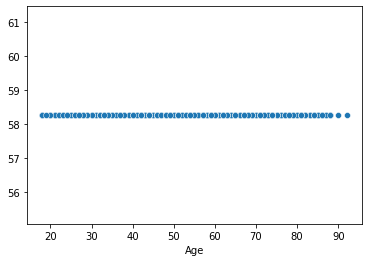

In [16]:
sns.scatterplot(y_test, rbf_predictions) #Show a scatter plot of the data 

xy_rbf = np.vstack([y_test,rbf_predictions]) #Stack arrays

z_rbf = gaussian_kde(xy_rbf)(xy_rbf) #Calculate point density estimates using Gaussian kernels.

fig,ax = plt.subplots()
ax.scatter(y_test, rbf_predictions, c=z_rbf, s=100) #Create a density scatter plot of the data 